In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

In [6]:
def load_model(model_name):
    json_file = open('model/' + model_name + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    loaded_model.load_weights('model/' + model_name + '_weights.h5')
    return loaded_model

In [7]:
def predict_model(img, model, show_details=False, image_size=(160, 160)):
    x = tf.image.resize(img, image_size)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict_on_batch(x).flatten()
    predictions = tf.nn.sigmoid(predictions)
    #     predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()[0]

In [9]:
class Image:
    
    def __init__(self, name, image_or_path):
        self.name = name
        self.get_image(image_or_path)
        self.mirrored = False
        
        
    def get_image(self, image_or_path):
        if isinstance(image_or_path, str):
            self.get_image_from_path(path)
            
        else:
            self.image = image_or_path
            
    
    def get_image_from_path(self, path):
        img = cv2.imread(path)
        self.image = img[:,:,::-1]
        
    
    def mirror(self):
        self.image = cv2.flip(self.image, 1)
        self.mirrored = not self.mirrored
        self.name = self.name+'_mirror' if self.mirrored else self.name.split('_mirror')[0] 
    

    def show(self):
        plt.title(self.name)
        plt.imshow(self.image)
        
    
    def predict(self, model):
        predict_model(self.image, model)
        

In [10]:
class Eye(Image):
    
    self.model = load_model('model_eye_right')
    
    def __init__(self, name_face, image, side='right'):
        self.name_face = name_face
        self.side = side
        super().__init__(name_face+'_'+side+'_eye', image)
        
    
    def predict_open_closed(self):
        self.open_closed = self.predict(model)

NameError: name 'tf' is not defined

In [144]:
class Face(Image):
    
    def __init__(self, name, image_or_path=None, eyes=2):
        super().__init__(name, image_or_path)
        self.get_eyes(eyes)
        

    def get_eyes(self, eyes):
        if eyes == 1:
            print('Not implemented yet')
            
        if eyes == 2:
            eye1 = Eye(self.name, self.crop_eye(side='right'))
            eye2 = Eye(self.name, self.crop_eye(side='left'))
        
        self.eye = (eye1, eye2)
        
    
    def crop_eye(self, side, amplitude=0.45, height=0.1, wide=0.1):
        if side == 'right':
            image_eye = self.image[round(self.image.shape[0] * height):round(self.image.shape[0] * (height + amplitude)),
                       round(self.image.shape[1] * wide):round(self.image.shape[1] * (amplitude + wide))]
        else:
            image_eye = self.image[round(self.image.shape[0] * height):round(self.image.shape[0] * (height + amplitude)),
                       round(self.image.shape[1] * (1 - (amplitude + wide))):round(self.image.shape[1] * (1 - wide))]
        return image_eye
        

In [145]:
path='../data/test/profile_test/front6.jpg'

In [146]:
face1 = Face('face1', image_or_path=path)

In [134]:
face1.eye[0].mirror()

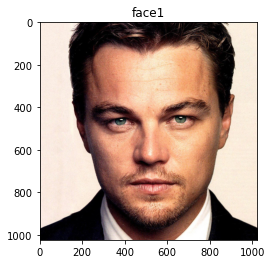

In [136]:
face1.show()